---
# Load data
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("IBM_stock.npy")

In [3]:
data.shape

(3019, 1)

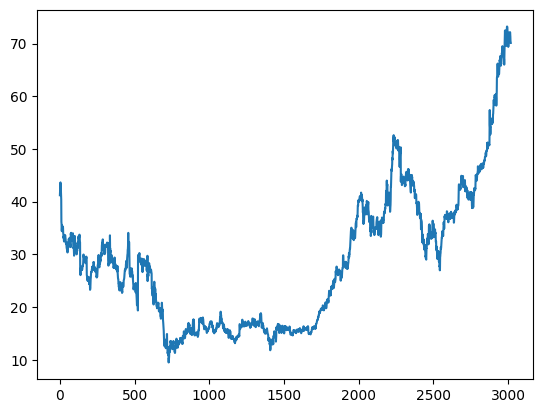

In [4]:
plt.plot(data)

---
# Data processing
---

In [21]:
# split_sequence function definition
def split_sequence(sequence, n_steps) :
    X, y = list(), list()
    for i in range(len(sequence)) :
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1 :
            break
        # gather input and outpt parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [22]:
X, y = split_sequence(data, 60)

In [7]:
X.shape, y.shape

((2959, 60, 1), (2959, 1))

# Create dataset

In [17]:
from sklearn.model_selection import train_test_split

In [23]:
# create dataset
m = len(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train.shape

(2367, 60, 1)

In [25]:
X_test.shape

(592, 60, 1)

---
# Deep learning model
---

In [26]:
from keras import Input
from keras.layers import LSTM, Dense
from keras.models import Model
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.saving import load_model

In [27]:
n_steps = X.shape[1]
n_features = X.shape[2]

In [ ]:
# define callbacks
earlystop = EarlyStopping(monitor = "loss", patience = 5, mode = "min")
checkpoint = ModelCheckpoint("modelIMB/bestmodel.keras")

In [48]:
# define model
x0 = Input(shape = (n_steps, n_features))
x1 = LSTM(20, activation = "relu", return_sequences = True)(x0)
x2 = LSTM(10, activation = "relu")(x1)
output = Dense(1)(x2)

model = Model(inputs = x0, outputs = output)
model.compile(optimizer = optimizers.Adam(learning_rate = 0.005), loss = "mse")

# model fitting
history = model.fit(X_train, y_train, epochs = 20, verbose = 1)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 125614.1953
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.1892
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4108
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5163
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3053
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9534
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8671
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9434
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8845
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8012
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8646
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8238
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8523
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9155
Epoch 15/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7920

# Plot losses

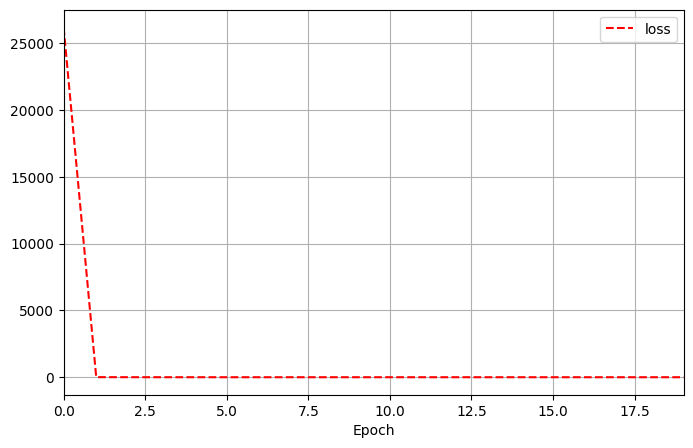

In [49]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8, 5), xlim = [0, len(history.epoch) - 1], grid = True, xlabel = "Epoch", style = ["r--", "b--."]
)
plt.show()

In [50]:
model.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7528 


0.7360242605209351